In [1]:
from collections import Counter
import ast
import re
import matplotlib.pyplot as plt


# Define a hashable dictionary class
class hashabledict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

In [2]:
cache = {(('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 16, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 8, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 4, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 2, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1, 2): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1, 4): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1, 8): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 8, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 8, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 4, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 4, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 2, 1): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 2, 1): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 1, 1): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 1, 1): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 1, 2): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 1, 2): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 1, 4): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 1, 4): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 1, 8): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 1, 8): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4), 1, 16): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8, 9), 1, 16): 2, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 4, 1): 225, (('A100', 'A100', 'A100', 'A100'), (3, 4), 4, 1): 204, (('A100', 'A100', 'A100', 'A100'), (5, 6), 4, 1): 177, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 4, 1): 90, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 2, 1): 226, (('A100', 'A100', 'A100', 'A100'), (3, 4), 2, 1): 245, (('A100', 'A100', 'A100', 'A100'), (5, 6), 2, 1): 296, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 2, 1): 71, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 1): 226, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 1): 263, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 1): 296, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 1): 169, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 2): 226, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 2): 266, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 2): 300, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 2): 91, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 4): 226, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 4): 299, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 4): 241, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 4): 54, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 8): 226, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 8): 299, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 8): 241, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 8): 54, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 16): 226, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 16): 299, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 16): 241, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 16): 54, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1, 32): 226, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1, 32): 299, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1, 32): 241, (('A100', 'A100', 'A100', 'A100'), (7, 8, 9), 1, 32): 54, (('A100', 'A100'), (5,), 2, 1): 834, (('A100', 'A100'), (6,), 2, 1): 835, (('A100', 'A100'), (7,), 2, 1): 772, (('A100', 'A100'), (8, 9), 2, 1): 464, (('A100', 'A100'), (5,), 1, 1): 682, (('A100', 'A100'), (6,), 1, 1): 693, (('A100', 'A100'), (7,), 1, 1): 853, (('A100', 'A100'), (8, 9), 1, 1): 576, (('A100', 'A100'), (5,), 1, 2): 731, (('A100', 'A100'), (6,), 1, 2): 715, (('A100', 'A100'), (7,), 1, 2): 788, (('A100', 'A100'), (8, 9), 1, 2): 473, (('A100', 'A100'), (5,), 1, 4): 723, (('A100', 'A100'), (6,), 1, 4): 709, (('A100', 'A100'), (7,), 1, 4): 734, (('A100', 'A100'), (8, 9), 1, 4): 367, (('A100', 'A100'), (5,), 1, 8): 722, (('A100', 'A100'), (6,), 1, 8): 579, (('A100', 'A100'), (7,), 1, 8): 574, (('A100', 'A100'), (8, 9), 1, 8): 104, (('A100', 'A100'), (5,), 1, 16): 722, (('A100', 'A100'), (6,), 1, 16): 579, (('A100', 'A100'), (7,), 1, 16): 574, (('A100', 'A100'), (8, 9), 1, 16): 104, (('A100', 'A100'), (5,), 1, 32): 722, (('A100', 'A100'), (6,), 1, 32): 579, (('A100', 'A100'), (7,), 1, 32): 574, (('A100', 'A100'), (8, 9), 1, 32): 104, (('A100', 'A100'), (5,), 1, 64): 722, (('A100', 'A100'), (6,), 1, 64): 579, (('A100', 'A100'), (7,), 1, 64): 574, (('A100', 'A100'), (8, 9), 1, 64): 104, (('A100', 'A100'), (0, 1), 2, 1): 731, (('A100', 'A100', 'A100', 'A100'), (2, 3), 4, 1): 205, (('A100', 'A100', 'A100', 'A100'), (4, 5), 4, 1): 183, (('A100', 'A100'), (0, 1), 1, 1): 731, (('A100', 'A100', 'A100', 'A100'), (2, 3), 2, 1): 175, (('A100', 'A100', 'A100', 'A100'), (4, 5), 2, 1): 290, (('A100', 'A100'), (0, 1), 1, 2): 731, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 1): 230, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 1): 275, (('A100', 'A100'), (0, 1), 1, 4): 731, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 2): 209, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 2): 289, (('A100', 'A100'), (0, 1), 1, 8): 731, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 4): 303, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 4): 301, (('A100', 'A100'), (0, 1), 1, 16): 731, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 8): 303, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 8): 301, (('A100', 'A100'), (0, 1), 1, 32): 731, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 16): 303, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 16): 301, (('A100', 'A100'), (0, 1), 1, 64): 731, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1, 32): 303, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1, 32): 301, (('A100', 'A100'), (3,), 2, 1): 754, (('A100', 'A100'), (3,), 1, 1): 909, (('A100', 'A100'), (3,), 1, 2): 809, (('A100', 'A100'), (3,), 1, 4): 844, (('A100', 'A100'), (3,), 1, 8): 821, (('A100', 'A100'), (3,), 1, 16): 821, (('A100', 'A100'), (3,), 1, 32): 821, (('A100', 'A100'), (3,), 1, 64): 821, (('A100', 'A100'), (4,), 2, 1): 723, (('A100', 'A100'), (4,), 1, 1): 762, (('A100', 'A100'), (4,), 1, 2): 789, (('A100', 'A100'), (4,), 1, 4): 792, (('A100', 'A100'), (4,), 1, 8): 839, (('A100', 'A100'), (4,), 1, 16): 839, (('A100', 'A100'), (4,), 1, 32): 839, (('A100', 'A100'), (4,), 1, 64): 839, (('A100', 'A100'), (2,), 2, 1): 793, (('A100', 'A100'), (2,), 1, 1): 858, (('A100', 'A100'), (2,), 1, 2): 774, (('A100', 'A100'), (2,), 1, 4): 858, (('A100', 'A100'), (2,), 1, 8): 858, (('A100', 'A100'), (2,), 1, 16): 858, (('A100', 'A100'), (2,), 1, 32): 858, (('A100', 'A100'), (2,), 1, 64): 858, (('A100', 'A100', 'A100', 'A100'), (6, 7), 4, 1): 189, (('A100', 'A100', 'A100', 'A100'), (6, 7), 2, 1): 241, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 1): 281, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 2): 257, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 4): 199, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 8): 199, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 16): 199, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1, 32): 199, (('A100', 'A100'), (6, 7), 1, 2): 45, (('A100', 'A100'), (8,), 1, 2): 517, (('A100', 'A100'), (9,), 1, 2): 258, (('A100', 'A100'), (6, 7), 1, 4): 47, (('A100', 'A100'), (8,), 1, 4): 536, (('A100', 'A100'), (9,), 1, 4): 364, (('A100', 'A100'), (6, 7), 1, 8): 158, (('A100', 'A100'), (8,), 1, 8): 717, (('A100', 'A100'), (9,), 1, 8): 627, (('A100', 'A100'), (6, 7), 1, 16): 158, (('A100', 'A100'), (8,), 1, 16): 717, (('A100', 'A100'), (9,), 1, 16): 627, (('A100', 'A100'), (6, 7), 1, 32): 158, (('A100', 'A100'), (8,), 1, 32): 717, (('A100', 'A100'), (9,), 1, 32): 627, (('A100', 'A100'), (6, 7), 1, 64): 158, (('A100', 'A100'), (8,), 1, 64): 717, (('A100', 'A100'), (9,), 1, 64): 627, (('A100', 'A100'), (5, 6), 1, 2): 77, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 1): 167, (('A100', 'A100'), (5, 6), 2, 1): 12, (('A100', 'A100', 'A100', 'A100'), (8, 9), 4, 1): 136, (('A100', 'A100'), (5, 6), 1, 1): 109, (('A100', 'A100', 'A100', 'A100'), (8, 9), 2, 1): 155, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 1): 57, (('A100', 'A100'), (5, 6), 1, 4): 97, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 2): 135, (('A100', 'A100'), (5, 6), 1, 8): 112, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 4): 172, (('A100', 'A100'), (5, 6), 1, 16): 112, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 8): 172, (('A100', 'A100'), (5, 6), 1, 32): 112, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 16): 172, (('A100', 'A100'), (5, 6), 1, 64): 112, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1, 32): 172, (('A100', 'A100'), (8,), 2, 1): 353, (('A100', 'A100'), (9,), 2, 1): 267, (('A100', 'A100'), (8,), 1, 1): 506, (('A100', 'A100'), (9,), 1, 1): 155, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3), 8, 1): 1, (('A100',), (4,), 1, 1): 773, (('A100',), (5,), 1, 1): 698, (('A100',), (6,), 1, 1): 713, (('A100',), (), 1, 1): 3144, (('A100',), (7,), 1, 1): 734, (('A100',), (8,), 1, 1): 358, (('A100',), (9,), 1, 1): 634, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3), 4, 1): 1, (('A100',), (4,), 1, 2): 704, (('A100',), (5,), 1, 2): 625, (('A100',), (6,), 1, 2): 658, (('A100',), (), 1, 2): 3558, (('A100',), (7,), 1, 2): 625, (('A100',), (8,), 1, 2): 209, (('A100',), (9,), 1, 2): 1088, (('A100',), (), 1, 4): 3232, (('A100',), (5,), 1, 4): 644, (('A100',), (6,), 1, 4): 626, (('A100',), (7,), 1, 4): 578, (('A100',), (9,), 1, 4): 1088, (('A100',), (5,), 1, 8): 610, (('A100',), (), 1, 8): 3357, (('A100',), (6,), 1, 8): 628, (('A100',), (7,), 1, 8): 650, (('A100',), (9,), 1, 8): 1088, (('A100',), (5,), 1, 16): 611, (('A100',), (), 1, 16): 3255, (('A100',), (6,), 1, 16): 657, (('A100',), (7,), 1, 16): 675, (('A100',), (9,), 1, 16): 1088, (('A100',), (5,), 1, 32): 610, (('A100',), (), 1, 32): 3262, (('A100',), (6,), 1, 32): 657, (('A100',), (7,), 1, 32): 675, (('A100',), (9,), 1, 32): 1088, (('A100',), (5,), 1, 64): 610, (('A100',), (), 1, 64): 3262, (('A100',), (6,), 1, 64): 657, (('A100',), (7,), 1, 64): 675, (('A100',), (9,), 1, 64): 1088, (('A100',), (5,), 1, 128): 610, (('A100',), (), 1, 128): 3262, (('A100',), (6,), 1, 128): 657, (('A100',), (7,), 1, 128): 675, (('A100',), (9,), 1, 128): 1088, (('A100',), (0, 1), 1, 1): 391, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4), 8, 1): 1, (('A100',), (0, 1), 1, 2): 408, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4), 4, 1): 1, (('A100',), (0,), 1, 4): 864, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (1, 2, 3, 4), 2, 1): 1, (('A100',), (8,), 1, 4): 585, (('A100',), (0,), 1, 8): 696, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (1, 2, 3, 4), 1, 1): 1, (('A100',), (8,), 1, 8): 510, (('A100',), (0,), 1, 16): 555, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (1, 2, 3, 4), 1, 2): 1, (('A100',), (8,), 1, 16): 614, (('A100',), (0, 1), 1, 32): 534, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 1, 4): 2, (('A100',), (0, 1), 1, 64): 534, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 1, 8): 2, (('A100',), (0, 1), 1, 128): 534, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 1, 16): 2, (('A100',), (2,), 1, 1): 680, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5), 8, 1): 2, (('A100',), (2,), 1, 2): 657, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5), 4, 1): 2, (('A100',), (1,), 1, 4): 554, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 2, 1): 1, (('A100',), (1,), 1, 8): 554, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 1, 1): 1, (('A100',), (1,), 1, 16): 554, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4, 5), 1, 2): 1, (('A100',), (0,), 1, 32): 554, (('A100',), (1,), 1, 32): 554, (('A100',), (0,), 1, 64): 554, (('A100',), (1,), 1, 64): 554, (('A100',), (0,), 1, 128): 554, (('A100',), (1,), 1, 128): 554, (('A100',), (0,), 1, 1): 697, (('A100',), (1,), 1, 1): 391, (('A100',), (0,), 1, 2): 680, (('A100',), (1,), 1, 2): 552, (('A100',), (2,), 1, 4): 672, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5), 2, 1): 1, (('A100',), (2,), 1, 8): 609, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 1, 1): 2, (('A100',), (2,), 1, 16): 656, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 1, 2): 2, (('A100',), (2,), 1, 32): 656, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 1, 4): 2, (('A100',), (2,), 1, 64): 656, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 1, 8): 2, (('A100',), (2,), 1, 128): 656, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 1, 16): 2, (('A100',), (3,), 1, 1): 749, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6), 8, 1): 1, (('A100',), (3,), 1, 2): 652, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6), 4, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6), 2, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7), 8, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7), 4, 1): 1, (('A100',), (3,), 1, 4): 687, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6), 2, 1): 1, (('A100',), (3,), 1, 8): 680, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 1, 1): 2, (('A100',), (3,), 1, 16): 618, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 1, 2): 2, (('A100',), (3,), 1, 32): 618, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 1, 4): 2, (('A100',), (3,), 1, 64): 618, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 1, 8): 2, (('A100',), (3,), 1, 128): 618, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 1, 16): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 8, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 4, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6, 7), 2, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (6, 7, 8), 8, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (6, 7, 8), 4, 1): 1, (('A100',), (4,), 1, 4): 662, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 2, 1): 1, (('A100',), (4,), 1, 8): 642, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 1, 1): 1, (('A100',), (4,), 1, 16): 600, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 1, 2): 1, (('A100',), (4,), 1, 32): 600, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 1, 4): 1, (('A100',), (4,), 1, 64): 600, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 1, 8): 1, (('A100',), (4,), 1, 128): 600, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7, 8), 1, 16): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (7, 8, 9), 8, 1): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (7, 8, 9), 4, 1): 1, (('A100', 'A100', 'A100', 'A100'), (0, 1), 4, 1): 1, (('A100', 'A100', 'A100', 'A100'), (1, 2), 4, 1): 116, (('A100', 'A100', 'A100', 'A100'), (1, 2), 1, 1): 141, (('A100', 'A100', 'A100', 'A100'), (1, 2), 1, 2): 141, (('A100',), (0, 1), 1, 16): 533, (('A100',), (8,), 1, 32): 608, (('A100',), (8,), 1, 64): 608, (('A100',), (8,), 1, 128): 608, (('A100', 'A100', 'A100', 'A100'), (3,), 4, 1): 66, (('A100', 'A100', 'A100', 'A100'), (4,), 2, 1): 6, (('A100', 'A100', 'A100', 'A100'), (1, 2), 2, 1): 128, (('A100', 'A100'), (6, 7), 2, 1): 23, (('A100', 'A100'), (6, 7), 1, 1): 45, (('A100', 'A100'), (7, 8), 1, 8): 72, (('A100', 'A100'), (7, 8), 1, 16): 72, (('A100', 'A100'), (7, 8), 1, 32): 72, (('A100', 'A100'), (7, 8), 1, 64): 72, (('A100', 'A100', 'A100', 'A100'), (5,), 4, 1): 103, (('A100', 'A100', 'A100', 'A100'), (5,), 2, 1): 4, (('A100', 'A100', 'A100', 'A100'), (4,), 4, 1): 61, (('A100', 'A100', 'A100', 'A100'), (2,), 4, 1): 25, (('A100', 'A100', 'A100', 'A100'), (7,), 4, 1): 68, (('A100', 'A100'), (3, 4), 1, 2): 14, (('A100', 'A100'), (3, 4), 1, 4): 24, (('A100',), (0, 1), 1, 4): 224, (('A100',), (0, 1), 1, 8): 392, (('A100', 'A100', 'A100', 'A100'), (6, 7, 8), 1, 4): 41, (('A100', 'A100', 'A100', 'A100'), (6, 7, 8), 1, 8): 41, (('A100', 'A100', 'A100', 'A100'), (6, 7, 8), 1, 16): 41, (('A100', 'A100', 'A100', 'A100'), (6, 7, 8), 1, 32): 41, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 4): 217, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 8): 217, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 16): 217, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 32): 217, (('A100', 'A100', 'A100', 'A100'), (7, 8), 4, 1): 141, (('A100', 'A100', 'A100', 'A100'), (7, 8), 2, 1): 141, (('A100', 'A100', 'A100', 'A100'), (7, 8), 1, 2): 166, (('A100', 'A100', 'A100', 'A100'), (6,), 4, 1): 93, (('A100', 'A100'), (4, 5), 2, 1): 34, (('A100', 'A100'), (4, 5), 1, 1): 35, (('A100', 'A100'), (4, 5), 1, 2): 10, (('A100', 'A100'), (4, 5), 1, 4): 16, (('A100', 'A100'), (7, 8), 2, 1): 25, (('A100', 'A100'), (7, 8), 1, 2): 15, (('A100', 'A100'), (7, 8), 1, 4): 72, (('A100', 'A100', 'A100', 'A100'), (3,), 2, 1): 61, (('A100', 'A100', 'A100', 'A100'), (5, 6, 7), 1, 4): 52, (('A100', 'A100', 'A100', 'A100'), (5, 6, 7), 1, 8): 52, (('A100', 'A100', 'A100', 'A100'), (5, 6, 7), 1, 16): 52, (('A100', 'A100', 'A100', 'A100'), (5, 6, 7), 1, 32): 52, (('A100', 'A100'), (3, 4), 2, 1): 64, (('A100', 'A100', 'A100', 'A100'), (7,), 2, 1): 66, (('A100', 'A100', 'A100', 'A100'), (7,), 1, 2): 25, (('A100', 'A100', 'A100', 'A100'), (8,), 4, 1): 22, (('A100',), (8, 9), 1, 1): 454, (('A100', 'A100'), (), 2, 1): 40, (('A100', 'A100'), (1,), 2, 1): 190, (('A100', 'A100'), (1,), 1, 2): 168}


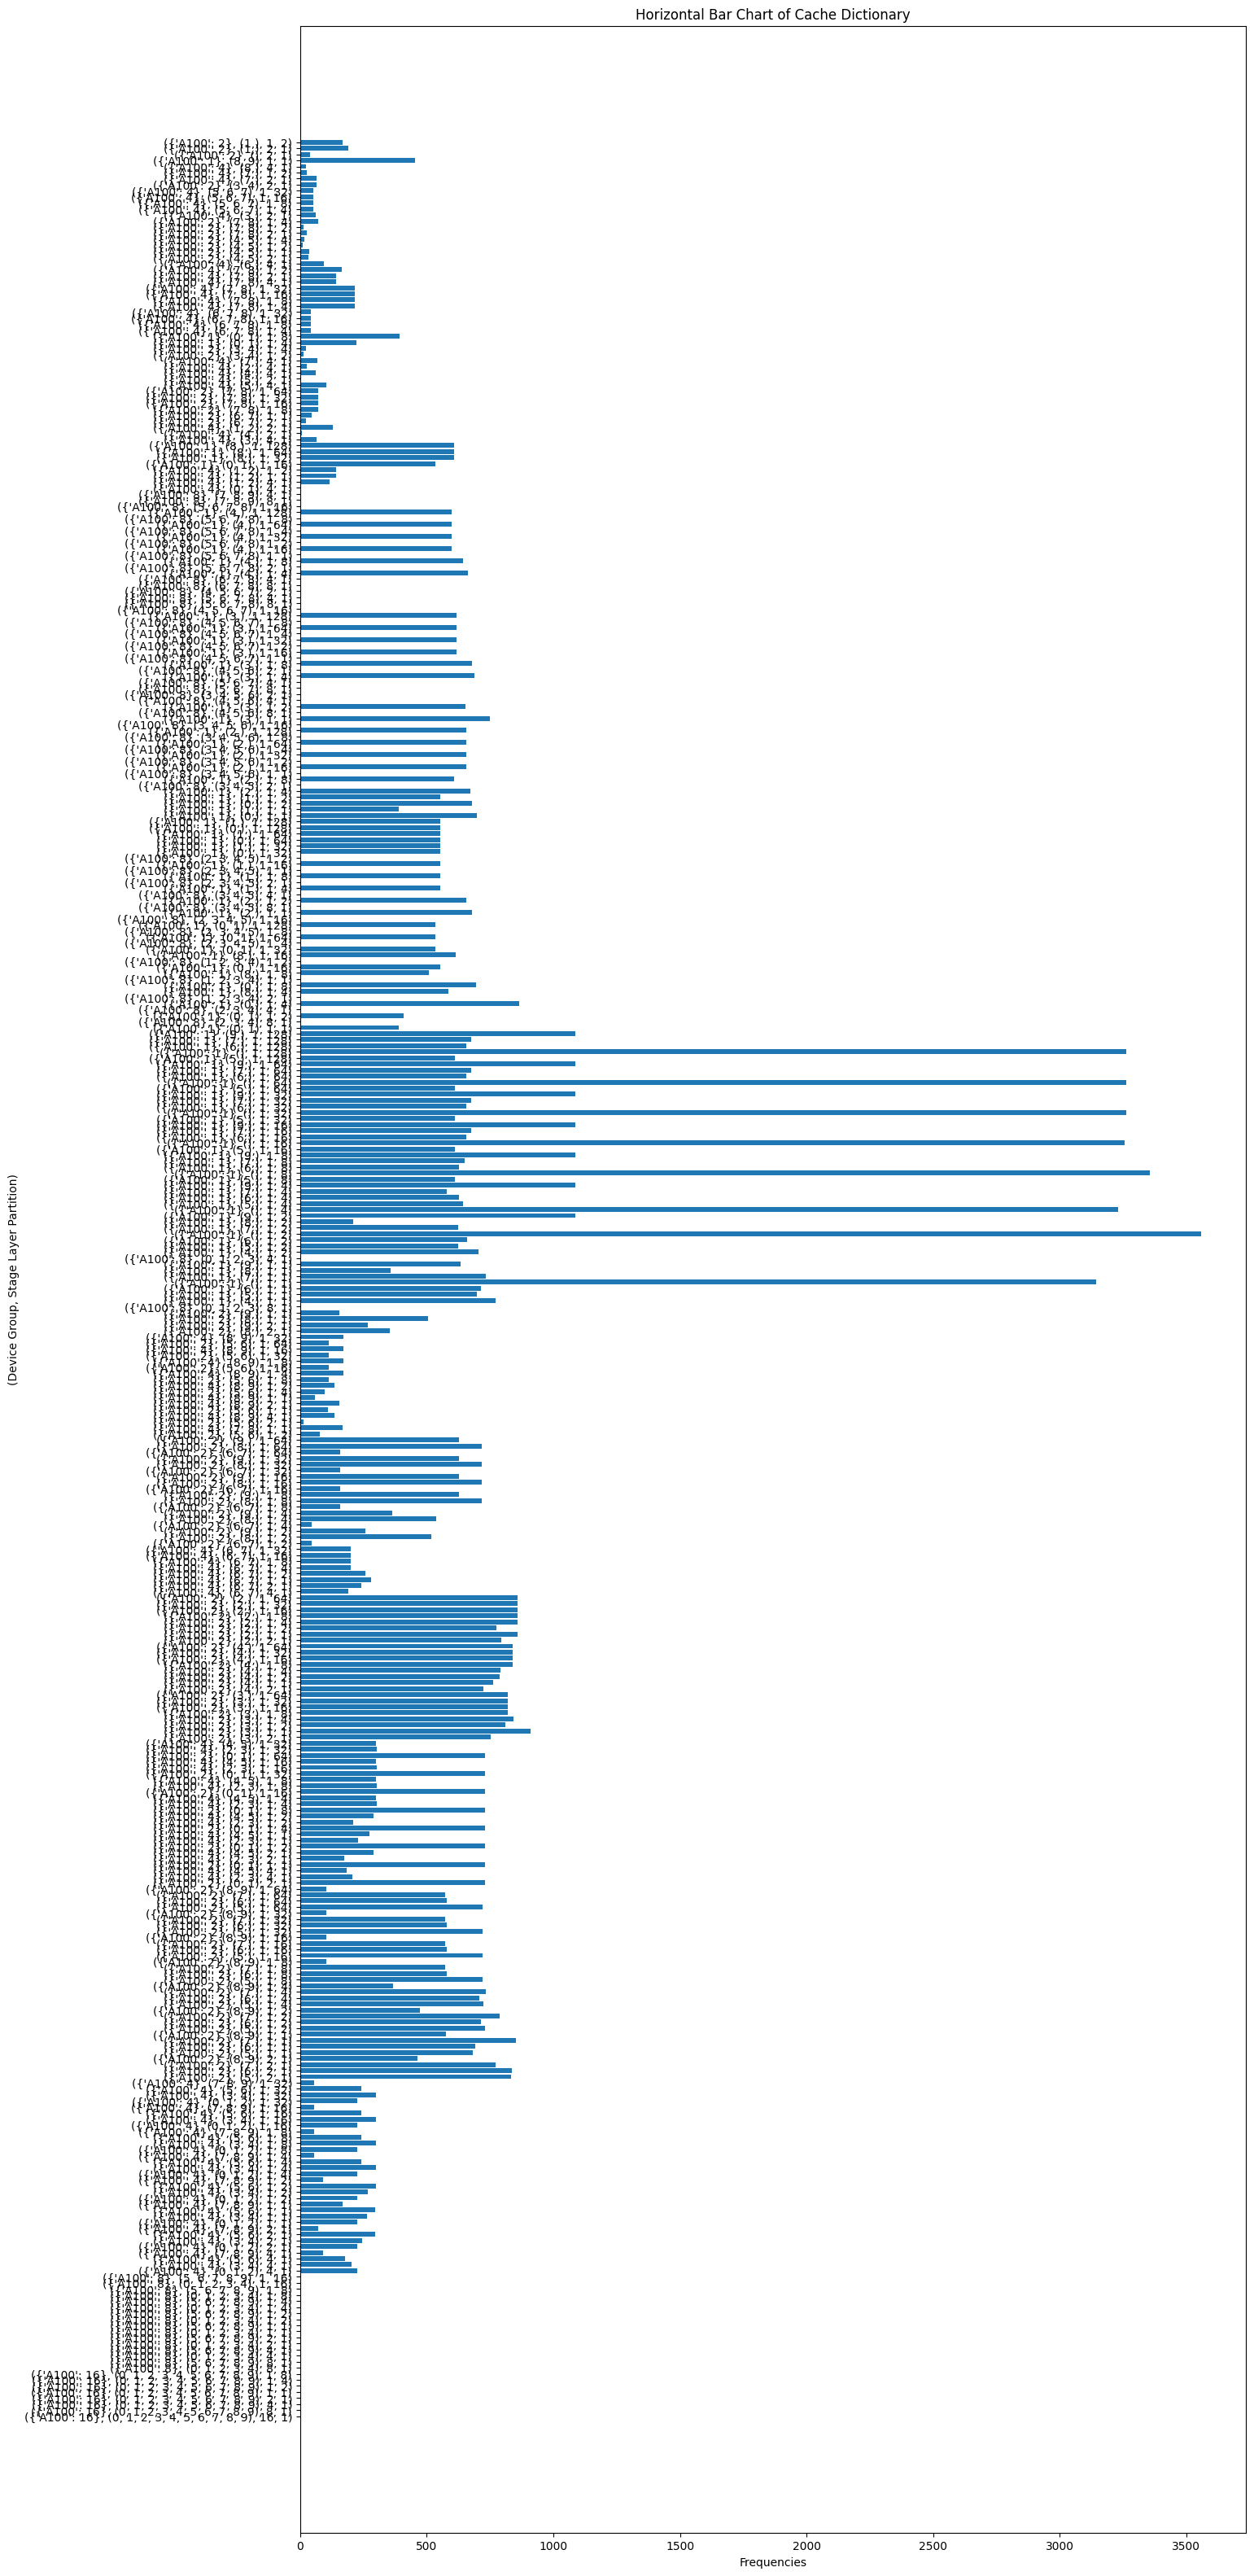

In [3]:
cache_dict = {}
for key, value in cache.items():
    cache_dict[(hashabledict(dict(Counter(tuple(key[0])))), key[1], key[2], key[3])] = value

# Extract keys and values from the dictionary
keys = list(cache_dict.keys())
values = list(cache_dict.values())

# Create a horizontal bar chart
plt.figure(figsize=(15, 40))
plt.barh(range(len(keys)), values, tick_label=[str(k) for k in keys])
plt.yticks(rotation=0)
plt.ylabel('(Device Group, Stage Layer Partition)')
plt.xlabel('Frequencies')
plt.title('Horizontal Bar Chart of Cache Dictionary')
plt.show()